In [1]:
import cmath
import control
from control.matlab import step
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

### Questão 1 - Prova 2 - Eric Reis

In [2]:
A = np.matrix('0 1;0 -2');
B = np.matrix('0; 1');
C = np.matrix('1 0');
D = 0;

G = control.ss(A,B,C,D)
G

<LinearIOSystem:sys[2]:['u[0]']->['y[0]']>

In [3]:
print(A)
print(B)
print(C)
print(D)

[[ 0  1]
 [ 0 -2]]
[[0]
 [1]]
[[1 0]]
0


In [4]:
system = control.ss2tf(G)
system

TransferFunction(array([1.]), array([1., 2., 0.]))

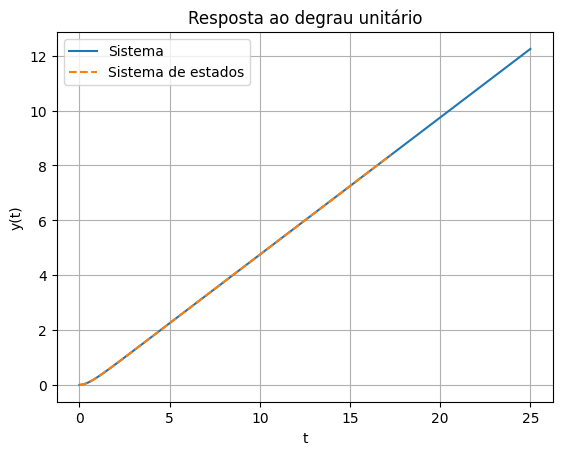

In [5]:
x, y = control.step_response(system)
x2, y2 = control.step_response(G)
plt.figure()
plt.plot(x, y, label='Sistema')
plt.plot(x2, y2, ls= '--', label='Sistema de estados')
plt.title("Resposta ao degrau unitário")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Verificando polos da planta
eigenvalues, eigenvectors = linalg.eig(A);
poles = eigenvalues
print(poles)

[ 0.+0.j -2.+0.j]


In [7]:
# Matriz de Controlabilidade
Mc = control.ctrb(A,B)
Mc

# Teste de Controlabilidade
rank_Mc = np.linalg.matrix_rank(Mc) 

if len(Mc) == rank_Mc:          
    print("O sistema é controlável")

O sistema é controlável


In [8]:
# Matrizes reduzidas
Aaa = np.matrix('0')
Aab = np.matrix('1')
Aba = np.matrix('0')
Abb = np.matrix('-2')

Ba = np.matrix('0')
Bb = np.matrix('1')

In [9]:
# Ganho do observador
Ke = 98 #valor fornecido na prova
K = np.matrix('25 5') #valor fornecido na prova

Achapeu = Abb-Ke*Aab;
Bchapeu = Achapeu*Ke+Aba-Ke*Aaa
Fchapeu = Bb-Ke*Ba;

Cchapeu = np.matrix('0;1');
Dchapeu = np.block([[1], [Ke]]);

In [10]:
print(f'Ke: {Ke}')
print(f'K: {K}')

Ke: 98
K: [[25  5]]


In [11]:
# simulação com equações recursivas
# definindo o intervalo de simulação e o vetor de entrada

T = 0.01; #fornecido na prova
tfinal = 5;
Kmax = int(tfinal/T+1);
k = np.linspace(0, Kmax, Kmax+1)
u = np.ones(len(k));

# definindo os vetores
x1 = np.zeros(len(k));
x2 = np.zeros(len(k));
x1_ponto = np.zeros(len(k));
x2_ponto = np.zeros(len(k));
y = np.zeros(len(k));
eta1 = np.zeros(len(k));
eta1_ponto = np.zeros(len(k));
xtil1 = np.zeros(len(k));
xtil2 = np.zeros(len(k));

# condições iniciais (podem ser diferentes de zero)
x1[0] = 0;  #  para k = 0
x2[0] = 0;  #  para k = 0
x1_ponto[0] = 0;  #  para k = 0
x2_ponto[0] = 0;  #  para k = 0
y[0] = C[0,0]*x1[0]+C[0,1]*x2[0]+D*u[0];  #  para k = 0
eta1[0] = 0;  #  para k = 0
eta1_ponto[0] = Fchapeu*u[0];  #  para k = 0


for j in range(1,Kmax-1):
    # sistema original
        # Equações dos integradores
        x1[j]=T*x1_ponto[j-1]+x1[j-1];
        x2[j]=T*x2_ponto[j-1]+x2[j-1];    
        
        # Equação diferencial de estados:  Xponto=A*X+B*U
        x1_ponto[j]=A[0,0]*x1[j]+A[0,1]*x2[j]+B[0]*u[j];  
        x2_ponto[j]=A[1,0]*x1[j]+A[1,1]*x2[j]+B[1]*u[j]; 

        # Equação de Saída: Y=C*X+D*U
        y[j] = C[0,0]*x1[j]+C[0,1]*x2[j]+D*u[j];

    # observador de ordem mínima
        # Equações dos integradores do observador
        eta1[j]=T*eta1_ponto[j-1]+eta1[j-1];
    
        # Equação diferencial de estados do observador
        eta1_ponto[j]=Achapeu*eta1[j]+Bchapeu*y[j]+Fchapeu*u[j];
    
    # Transformação
        # equação de saída do observador de ordem mínima
        xtil1[j]=Cchapeu[0,0]*eta1[j]+Dchapeu[0]*y[j];
        xtil2[j]=Cchapeu[1,0]*eta1[j]+Dchapeu[1]*y[j];

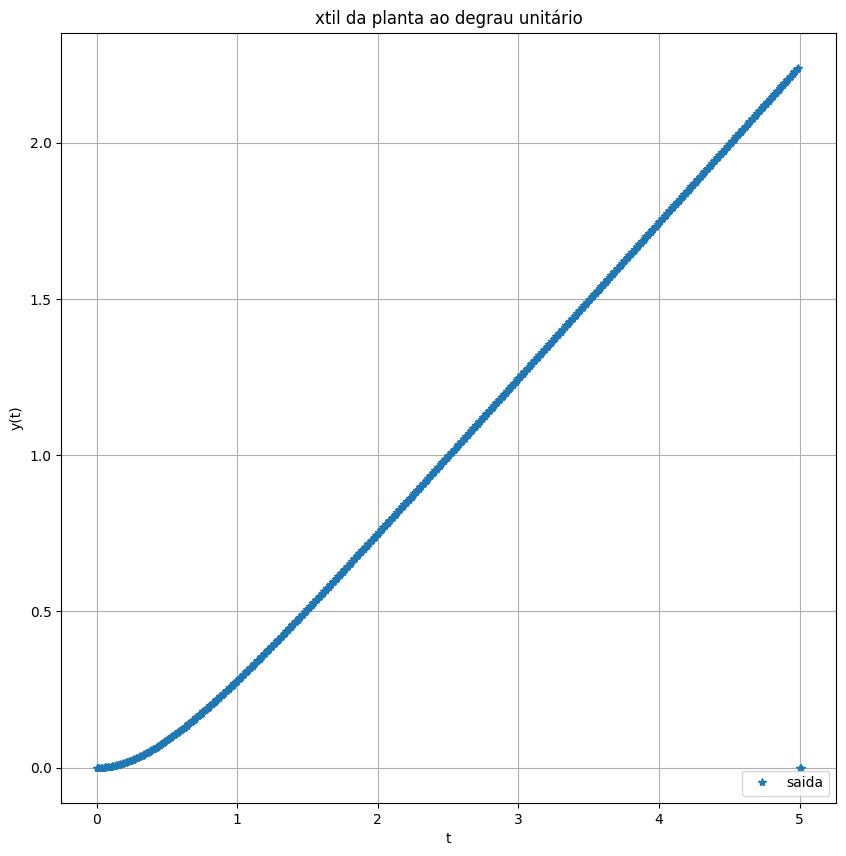

In [12]:
# resposta para entrada ao degrau
fig, ((ax1) ) = plt.subplots(1, 1)
fig.set_size_inches(10,10)

ax1.plot(k*T,xtil1,'*')
ax1.set_title("xtil da planta ao degrau unitário")
ax1.set_xlabel("t")
ax1.set_ylabel("y(t)")
ax1.legend(['saida'],loc="lower right")
ax1.grid(True,'both')

#### Sistema completo com controlador, observador e planta

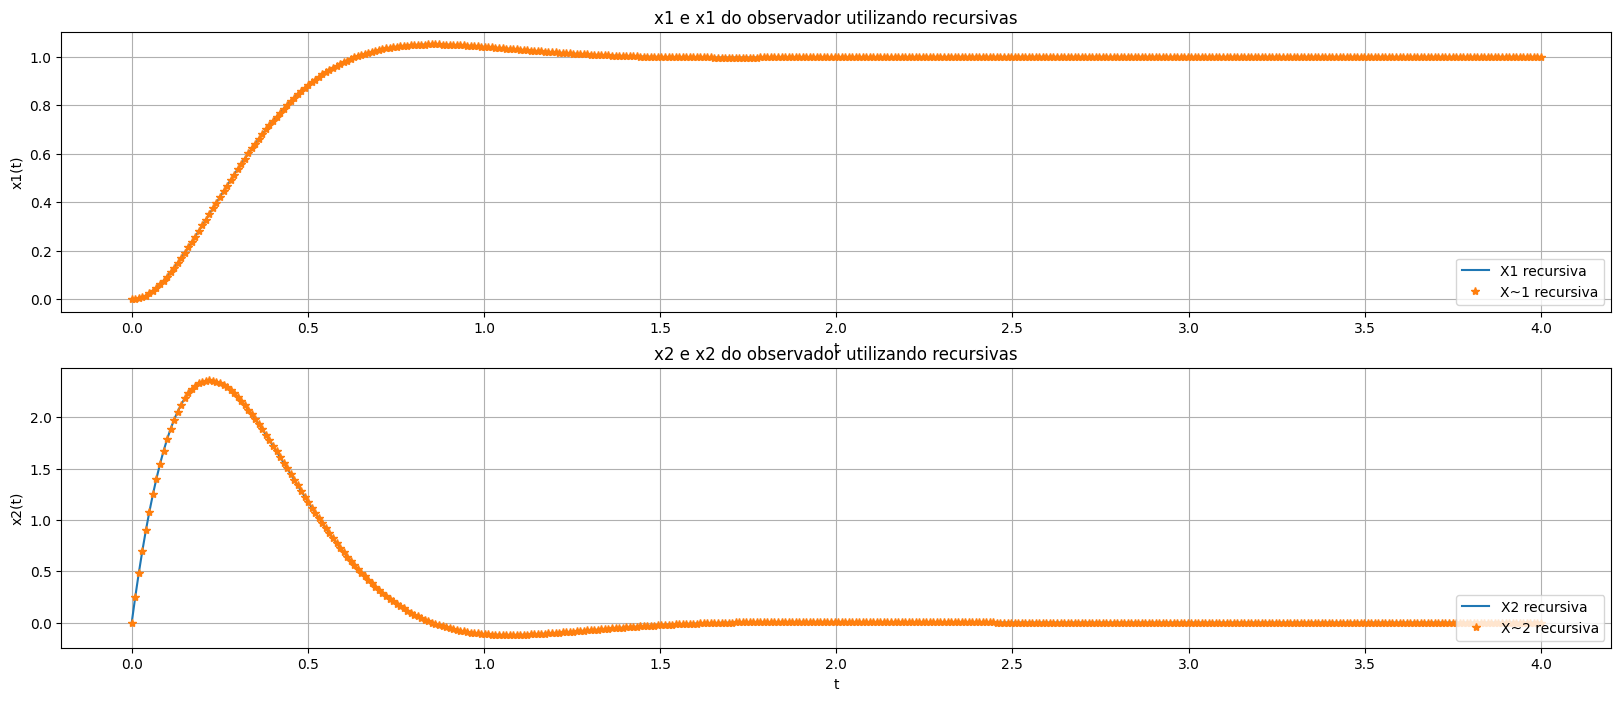

In [22]:
tfinal = 4;
Kmax = int((tfinal/T));
t = np.linspace(0, tfinal, Kmax);
r = np.ones(int(len(t)));
ksi = np.zeros(len(t));
u = np.zeros(len(t));

# vetores de estados
x1 = np.zeros(len(t));
x2 = np.zeros(len(t));
x1_ponto = np.zeros(len(t));
x2_ponto = np.zeros(len(t));
eta1 = np.zeros(len(t));
eta1_ponto = np.zeros(len(t));
xtil1 = np.zeros(len(t));
xtil2 = np.zeros(len(t));

# vetor de saída Y = C*X
y = np.zeros(len(t));

## Condições iniciais
y[0] = C[0,0]*x1[0] + C[0,1]*x2[0] + D*u[0];  #  para k = 0
ksi[0] = r[0] - y[0];
u[0] = -(K[0,1]*x2[0]) + K[0,0]*ksi[0];
x1_ponto[0] = A[0,0]*x1[0] + A[0,1]*x2[0] + B[0]*u[0];
x2_ponto[0] = A[1,0]*x1[0] + A[1,1]*x2[0] + B[1]*u[0];
eta1[0] = 0;  #  para k = 0
eta1_ponto[0] = Fchapeu*u[0];  #  para k = 0

for j in range(1,len(t)):
    # Equações dos integradores
    x1[j] = T*x1_ponto[j-1] + x1[j-1];
    x2[j] = T*x2_ponto[j-1] + x2[j-1];   
    
    # observador de ordem mínima
    # Equações dos integradores do observador
    eta1[j] = T*eta1_ponto[j-1]+eta1[j-1];
    
    # Equação de Saída: Y=C*X+D*U
    y[j] = C[0,0]*x1[j] + C[0,1]*x2[j] + D*u[j];

    # Equação de erro
    ksi[j] = r[j] - y[j];
    
    # Transformação
    # equação de saída do observador de ordem mínima
    xtil1[j] = Cchapeu[0,0]*eta1[j] + Dchapeu[0]*y[j];
    xtil2[j] = Cchapeu[1,0]*eta1[j] + Dchapeu[1]*y[j];

    # Equação da lei de controle
    u[j] = -(K[0,1]*xtil2[j]) + K[0,0]*ksi[j];

    # Equação diferencial de estados:  Xponto=A*X+B*U
    x1_ponto[j] = A[0,0]*x1[j] + A[0,1]*x2[j] + B[0]*u[j];  
    x2_ponto[j] = A[1,0]*x1[j] + A[1,1]*x2[j] + B[1]*u[j];
    
    # Equação diferencial de estados do observador
    eta1_ponto[j] = Achapeu*eta1[j] + Bchapeu*y[j] + Fchapeu*u[j];
    
fig, ((ax1, ax2) ) = plt.subplots(2, 1)
fig.set_size_inches(20,8)

ax1.plot(t, x1, t, xtil1,'*')
ax1.set_title("x1 e x1 do observador utilizando recursivas")
ax1.set_xlabel("t")
ax1.set_ylabel("x1(t)")
ax1.legend(['X1 recursiva','X~1 recursiva'],loc="lower right")
ax1.grid(True)

ax2.plot(t, x2, t, xtil2,'*')
ax2.set_title("x2 e x2 do observador utilizando recursivas")
ax2.set_xlabel("t")
ax2.set_ylabel("x2(t)")
ax2.legend(['X2 recursiva','X~2 recursiva'],loc="lower right")
ax2.grid(True)

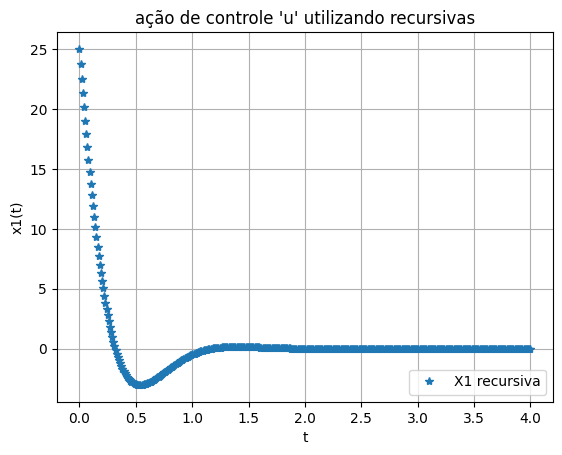

In [23]:
plt.plot(t, u, '*')
plt.title("ação de controle 'u' utilizando recursivas")
plt.xlabel("t")
plt.ylabel("x1(t)")
plt.legend(['X1 recursiva','X~1 recursiva'],loc="lower right")
plt.grid(True)

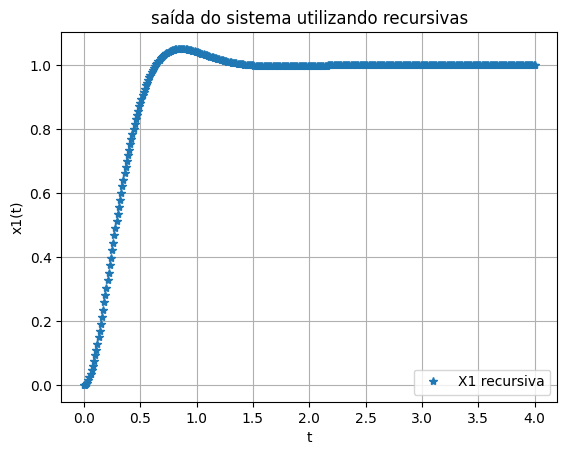

In [24]:
plt.plot(t, y, '*')
plt.title("saída do sistema utilizando recursivas")
plt.xlabel("t")
plt.ylabel("x1(t)")
plt.legend(['X1 recursiva','X~1 recursiva'],loc="lower right")
plt.grid(True)